In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../Linear Regression/DATA/hearing_test.csv')

In [7]:
df.head(5)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [9]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

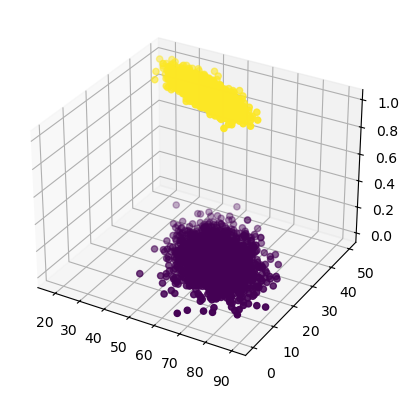

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [11]:
X = df.drop('test_result',axis=1)
y=df['test_result']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
# 4266751
mymodel = LogisticRegression()
mymodel.fit(x_train,y_train)
y_pred = mymodel.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)
conf = confusion_matrix(y_test , y_pred)
print(conf)

0.92
[[570  95]
 [ 37 948]]


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplaylay(x_test , y_test)

NameError: name 'ConfusionMatrixDisplaylay' is not defined

In [29]:
from sklearn.metrics import precision_score , recall_score
precision_score = precision_score(y_test , y_pred)
recall_score = recall_score(y_test , y_pred)
print(precision_score)
print(recall_score)

0.9089165867689357
0.9624365482233502


In [39]:
from sklearn.metrics import PrecisionRecallDisplay , RocCurveDisplay

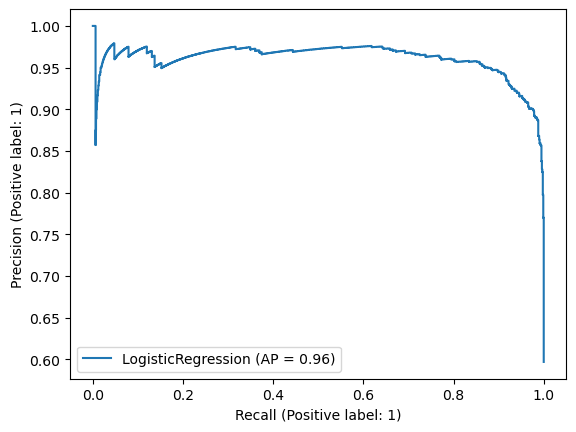

In [48]:
PrecisionRecallDisplay.from_estimator(mymodel , x_test , y_test)

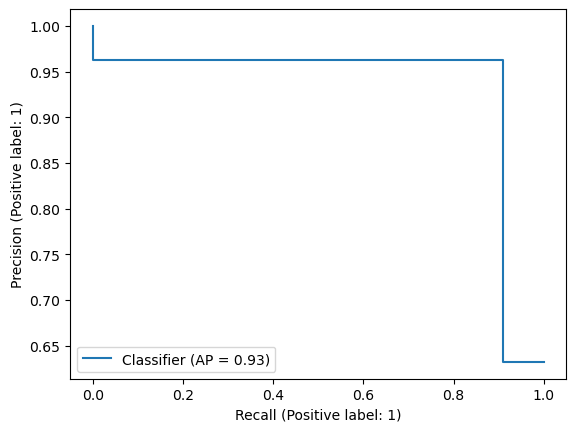

In [53]:
PrecisionRecallDisplay.from_predictions( y_pred , y_test)

In [54]:
RocCurveDisplay.from_estimator(mymodel , y_pred , y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 0 ... 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

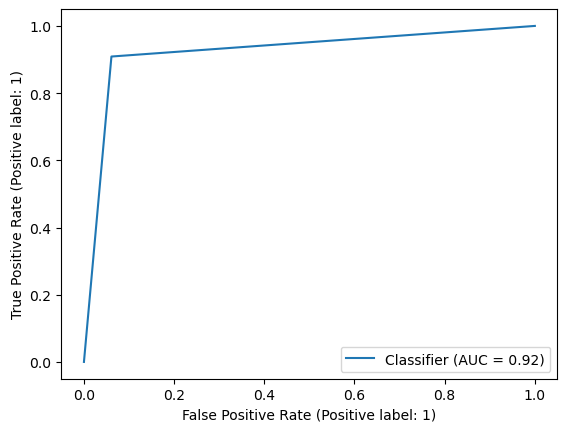

In [57]:
RocCurveDisplay.from_predictions(y_pred , y_test)